# **IMPORTING LIBRARY**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

In [2]:
def Load_File(path) :
    if os.path.isfile(path) :
        data = pd.read_csv(path)
        data = data.replace('?', np.nan)
        print("\n" + "Number of rows in data are %s" % len(data))
        print("Number of columns in data are %s" % len(data.columns) + "\n")
        print("Following are the data types of columns:- ")
        print(data.dtypes)
        print("Number of missing values in the data are:- ")
        print(data.isnull().sum())
        print("Data Import is Complete")
        
        return data
    else:
        print(path + " does not exist. Enter the correct path")

def labelEncoder(data, columns_list):
    for col in columns_list:
        encoder = LabelEncoder()
        data[col]  = encoder.fit_transform(data[col])
    return data

# **Load and Analysing Assessment**

**assessments.csv**

File ini berisi informasi tentang penilaian dalam presentasi modul. Biasanya setiap presentasi memiliki sejumlah penilaian yang dilanjutkan dengan ujian akhir. CSV berisi kolom:

**->** code_module – kode identifikasi modul tempat penilaian berada.

**->** code_presentation - kode identifikasi presentasi yang menjadi tempat penilaian.

**->** d_assessment – nomor identifikasi penilaian.

**->** assessment_type – jenis penilaian. Ada tiga jenis penilaian: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) dan Ujian Akhir (Ujian).

**->** date – informasi tentang tanggal penyerahan akhir penilaian yang dihitung sebagai jumlah hari sejak dimulainya presentasi modul. Tanggal mulai presentasi diberi angka 0 (nol).

**->** weight - bobot penilaian dalam%. Biasanya, Ujian diperlakukan secara terpisah dan memiliki bobot 100%; jumlah seluruh penilaian lainnya adalah 100%.

Jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.



In [3]:
oulad_assessment = Load_File('assessments.csv')


Number of rows in data are 206
Number of columns in data are 6

Following are the data types of columns:- 
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object
Number of missing values in the data are:- 
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
Data Import is Complete


In [4]:
oulad_assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


**Dibawah ini saya mengganti nilai hilang pada date dengan rata-rata nilai tanggal**

In [5]:
oulad_assessment['date'] = oulad_assessment['date'].fillna(int(oulad_assessment['date'].astype(float).mean()))

In [6]:
oulad_assessment['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

# **Load and Analysing Course**

**courses.csv**

File berisi daftar semua modul yang tersedia dan presentasinya. Kolomnya adalah:

**->**  code_module – nama kode modul, yang berfungsi sebagai pengenal.

**->**  code_presentation - nama kode presentasi.

**->**  module_presentation_length - panjang presentasi modul dalam hari.

Struktur presentasi B dan J mungkin berbeda dan oleh karena itu merupakan praktik yang baik untuk menganalisis presentasi B dan J secara terpisah. Namun demikian, untuk beberapa presentasi, presentasi B/J sebelumnya yang terkait tidak ada dan oleh karena itu presentasi J harus digunakan untuk menginformasikan presentasi B atau sebaliknya. Dalam kumpulan data, hal ini terjadi pada modul CCC, EEE, dan GGG.

In [7]:
oulad_courses = Load_File('courses.csv')


Number of rows in data are 22
Number of columns in data are 3

Following are the data types of columns:- 
code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object
Number of missing values in the data are:- 
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
Data Import is Complete


In [8]:
oulad_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


# **Load and Analysing Student Assessment**

**studentAssessment.csv**

File ini berisi hasil penilaian siswa. Jika siswa tidak menyerahkan penilaian, tidak ada hasil yang dicatat. Penyerahan ujian akhir hilang, jika hasil penilaian tidak tersimpan di sistem. File ini berisi kolom berikut:

**->** id_assessment – nomor identifikasi penilaian.

**->** id_student – nomor identifikasi unik

**->** date_subscribed – tanggal penyerahan siswa, diukur sebagai jumlah hari sejak dimulainya presentasi modul.

**->** is_banked – tanda status yang menunjukkan bahwa hasil penilaian telah ditransfer dari presentasi sebelumnya.

**->** score – skor siswa dalam penilaian ini. Kisarannya adalah dari 0 hingga 100. Skor yang lebih rendah dari 40 diartikan sebagai Gagal. Nilainya berkisar antara 0 hingga 100.

In [9]:
oulad_student_assessment = Load_File('studentAssessment.csv')


Number of rows in data are 173912
Number of columns in data are 5

Following are the data types of columns:- 
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object
Number of missing values in the data are:- 
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
Data Import is Complete


**Mengisi NaN pada atribut score dengan rata-rata nilai**

In [10]:
np.mean(oulad_student_assessment['score'])

75.7995729226023

In [11]:
oulad_student_assessment['score'].fillna(75, inplace=True)

In [12]:
oulad_student_assessment.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [13]:
oulad_student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


# **Load and Analysing Student Registration**

**studentRegistration.csv**

File ini berisi informasi waktu mahasiswa mendaftar presentasi modul. Bagi mahasiswa yang unregistrasi juga dicatat tanggal unregistrasinya. File berisi lima kolom:

**->** code_module – kode identifikasi untuk sebuah modul.

**->** code_presentation - kode identifikasi presentasi.

**->** id_student – nomor identifikasi unik untuk siswa.

**->** date_registration – tanggal pendaftaran siswa pada presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap dimulainya presentasi modul (misalnya nilai negatif -30 berarti siswa mendaftar untuk presentasi modul 30 hari sebelum presentasi modul dimulai).

**->** date_unregistration –tanggal pembatalan registrasi siswa dari presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap awal presentasi modul. Siswa yang menyelesaikan kursus mengosongkan bidang ini. Siswa yang unreg memiliki Withdrawal sebagai nilai kolom final_result pada file studentInfo.csv

In [14]:
oulad_student_registration = Load_File('studentRegistration.csv')


Number of rows in data are 32593
Number of columns in data are 5

Following are the data types of columns:- 
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object
Number of missing values in the data are:- 
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64
Data Import is Complete


**-Mengganti nilai null pada tanggal unregistration dengan nilai 0 dan 1 pada setiap hari yang ada pada student_registration**

**-Mengganti nilai date registration yang kosong dengan nilai 0**

In [15]:
oulad_student_registration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in oulad_student_registration['date_unregistration']]
oulad_student_registration['date_registration']   = oulad_student_registration['date_registration'].fillna(0).astype(float).apply(abs)

In [16]:
oulad_student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,159.0,0
1,AAA,2013J,28400,53.0,0
2,AAA,2013J,30268,92.0,1
3,AAA,2013J,31604,52.0,0
4,AAA,2013J,32885,176.0,0


# **Load and Analysing Student info**

**studentInfo.csv**

File ini berisi informasi demografis tentang siswa beserta hasilnya. File berisi kolom berikut:

**->** code_module – kode identifikasi untuk modul tempat siswa terdaftar.

**->** code_presentation - kode identifikasi presentasi saat siswa terdaftar pada modul.

**->** id_student – nomor identifikasi unik untuk siswa.

**->** gender – jenis kelamin siswa.

**->** region – mengidentifikasi wilayah geografis, tempat tinggal siswa saat mengambil presentasi modul.

**->** highest_education – tingkat pendidikan siswa tertinggi saat masuk ke presentasi modul.

**->** imd_band – menentukan pita Indeks Kerusakan Berganda dari tempat siswa tinggal selama presentasi modul.

**->** age_band – kelompok usia siswa.

**->** num_of_prev_attempts – berapa kali siswa mencoba modul ini.

**->** studied_credits – jumlah total SKS untuk modul yang sedang dipelajari siswa.

**->** disability – menunjukkan apakah siswa telah dinyatakan cacat.

**->** final_result – hasil akhir siswa dalam presentasi modul.

In [17]:
oulad_student_info = Load_File('studentInfo.csv')


Number of rows in data are 32593
Number of columns in data are 12

Following are the data types of columns:- 
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object
Number of missing values in the data are:- 
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
Data Import is Complete


**Mengisi nilai NaN pada fitur imd_band dengan nilai yang sering muncul atau modus**

In [19]:
print(oulad_student_info['imd_band'].unique())

oulad_student_info['imd_band'] = oulad_student_info['imd_band'].fillna(oulad_student_info['imd_band'].mode()[0])

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']


In [20]:
oulad_student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


# **Load and Analysing Student VLE**

**studentVLE.csv**

File studentVle.csv berisi informasi tentang interaksi setiap siswa dengan materi di VLE. File ini berisi kolom berikut:

**->** code_module – kode identifikasi untuk sebuah modul.

**->** code_presentation - kode identifikasi presentasi modul.

**->** id_student – nomor identifikasi unik untuk siswa.

**->** id_site - nomor identifikasi untuk materi VLE.

**->** date – tanggal interaksi siswa dengan materi yang diukur sebagai jumlah hari sejak dimulainya presentasi modul.

**->** sum_click – berapa kali siswa berinteraksi dengan materi pada hari itu.


In [21]:
oulad_student_vle = Load_File('studentVle.csv')


Number of rows in data are 10655280
Number of columns in data are 6

Following are the data types of columns:- 
code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object
Number of missing values in the data are:- 
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64
Data Import is Complete


In [22]:
oulad_student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


# **Load and Analysing VLE**

**vle.csv**

File CSV berisi informasi tentang materi yang tersedia di VLE. Biasanya ini adalah halaman html, file pdf, dll. Siswa memiliki akses ke materi ini secara online dan interaksi mereka dengan materi dicatat. File vle.csv berisi kolom berikut:

**->** id_site – nomor identifikasi materi.

**->** code_module – kode identifikasi untuk modul.

**->** code_presentation - kode identifikasi presentasi.

**->** activity_type – peran yang terkait dengan materi modul.

**->** week_from – minggu dimana bahan tersebut direncanakan akan digunakan.

**->** week_to – minggu sampai bahan tersebut direncanakan akan digunakan.

In [23]:
oulad_vle = Load_File('vle.csv')


Number of rows in data are 6364
Number of columns in data are 6

Following are the data types of columns:- 
id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object
Number of missing values in the data are:- 
id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64
Data Import is Complete


**Menghapus fitur week_from dan week_to pada data karena saya tidak menggunakannya untuk analisis data saya**

In [24]:
oulad_vle = oulad_vle.drop(['week_from', 'week_to'], axis = 1)

In [25]:
oulad_vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


**Berikut adalah tujuan analisis saya, saya nantinya akan mencari seberapa berpengaruh aktifitas siswa pada Virtual Learning Environment**

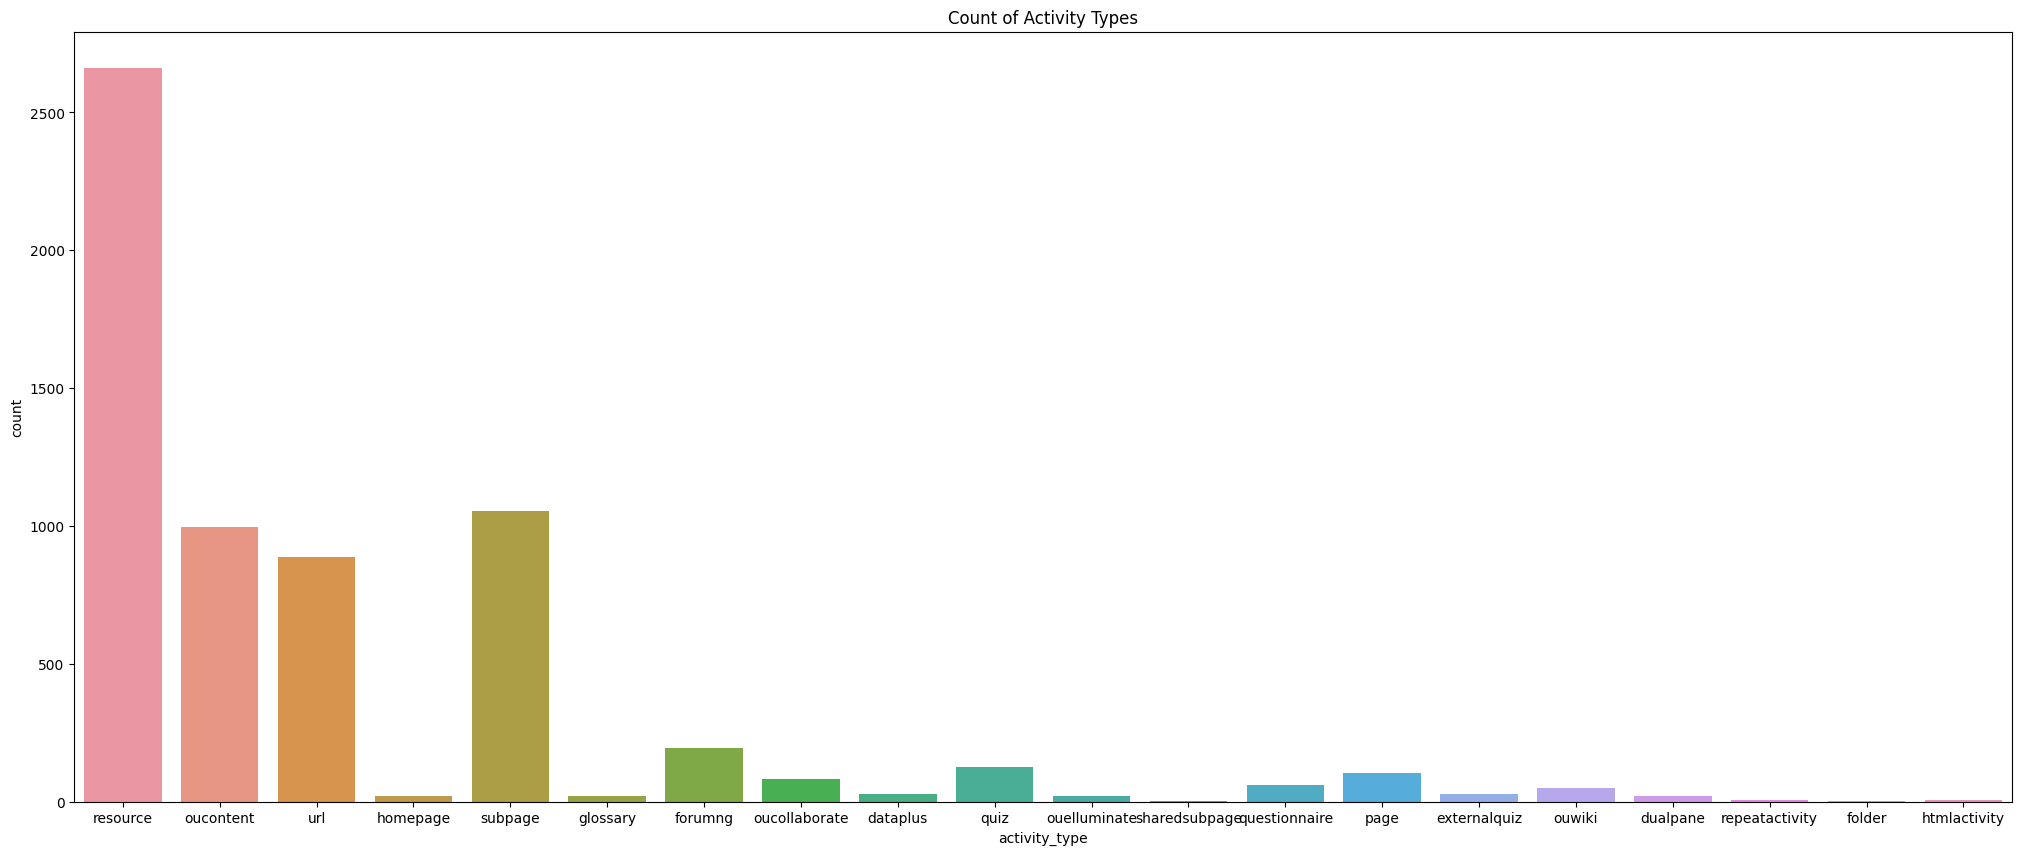

In [26]:
plt.figure(figsize=(25, 10))

sns.countplot(data=oulad_vle, x='activity_type')

plt.title('Count of Activity Types')

plt.show()

# **DATA INTEGRATION**

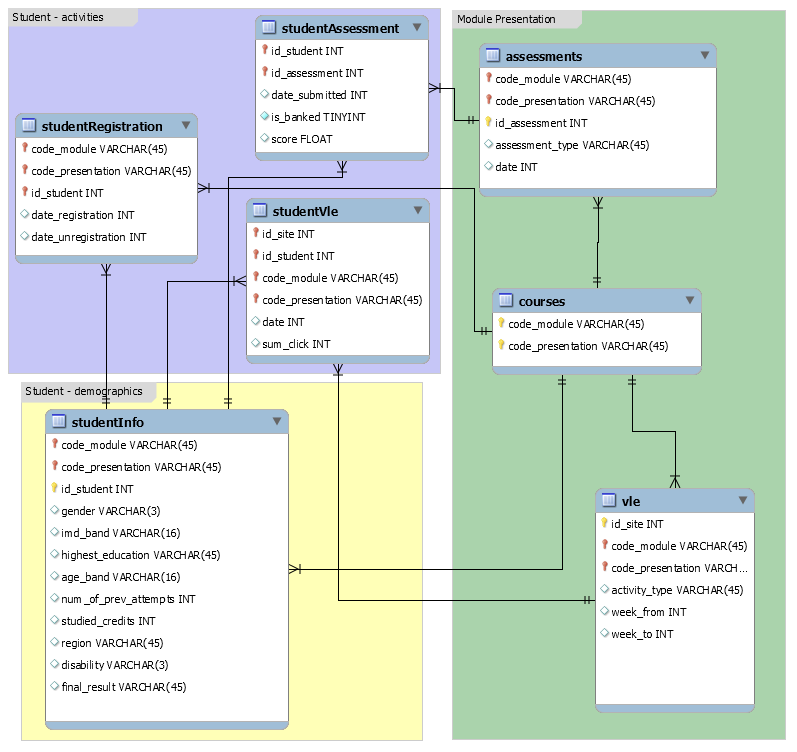

# **Penggabungan 1**

**Menggabungkan data assessment dan student_assessment**

In [115]:
join_assessment = oulad_student_assessment.merge(oulad_assessment, on="id_assessment")

**Pada fungsi berikut saya akan menambahkan fitur baru yaitu 'TMA_sumScore', 'CMA_sumScore', dan 'Exam_sumScore' yang dimana isi dari fitur tersebut adalah score berdasarkan tipe assessment pada setiap baris**

In [85]:
# Menyiapkan kolom baru untuk setiap assessment_type
for activity_label in join_assessment['assessment_type'].unique():
    new_col = f'{activity_label}_sumScore'
    join_assessment[new_col] = np.where(
        join_assessment['assessment_type'] == activity_label,
        join_assessment['score'],
        np.nan  # Menggunakan np.nan untuk nilai yang tidak sesuai
    )

**Nilai selain tipe assessment yang ada pada setiap baris akan dikonversi menjadi NaN seperti yang ditunjukkan pada data frame di bawah:**

In [86]:
join_assessment

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,TMA_sumScore,CMA_sumScore,Exam_sumScore
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,78.0,NaN,NaN
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,70.0,NaN,NaN
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,72.0,NaN,NaN
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,69.0,NaN,NaN
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,79.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,NaN,60.0,NaN
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,NaN,100.0,NaN
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,NaN,80.0,NaN
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,NaN,100.0,NaN


**Pada tahap ini saya akan menggabungkan seluruh nilai pada masing-masing assessment_type berdasarkan 'code_module', 'code_presentation', dan 'id_student'. Hal ini didasarkan pada setiap id_mahasiswa harus unik pada 'code_module' dan  'code_presentation', sehingga dataset akan sangat cocok untuk klasifikasi. Output dari penggabungan ini adalah setiap siswa akan memiliki jumlah keseluruhan score pada tipe assessment CMA, TMA, dan EXAM**

In [89]:
# Menggabungkan nilai-nilai yang memiliki id_student yang sama dan mengambil nilai rata-rata
df_assessment = join_assessment.groupby(['code_module', 'code_presentation', 'id_student']).sum(numeric_only=True).reset_index()

**Perlu dipahami bahwa hasil penggabungan yang bernilai NaN atau kosng adalah karena setiap modul dan semester (presentasion), tipe penilaian yang berbeda-beda. Sehingga pada satu modul tertentu bisa saja hanya memberikan penilaian CMA saja, TMA saja, CMA dan TMA saja, dan lain sebagainya**

In [90]:
df_assessment

,code_module,code_presentation,id_student,id_assessment,date_submitted,is_banked,score,date,weight,TMA_sumScore,CMA_sumScore,Exam_sumScore
0,AAA,2013J,11391,8770,562,0,410.0,571.0,100.0,410.0,0.0,0.0
1,AAA,2013J,28400,8770,571,0,332.0,571.0,100.0,332.0,0.0,0.0
2,AAA,2013J,31604,8770,561,0,380.0,571.0,100.0,380.0,0.0,0.0
3,AAA,2013J,32885,8770,628,0,272.0,571.0,100.0,272.0,0.0,0.0
4,AAA,2013J,38053,8770,581,0,340.0,571.0,100.0,340.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25838,GGG,2014J,2620947,336951,1449,0,800.0,1732.0,0.0,240.0,560.0,0.0
25839,GGG,2014J,2645731,336951,1406,0,793.0,1732.0,0.0,233.0,560.0,0.0
25840,GGG,2014J,2648187,336951,1324,0,690.0,1732.0,0.0,210.0,480.0,0.0
25841,GGG,2014J,2679821,74873,131,0,183.0,290.0,0.0,83.0,100.0,0.0


**Menyeleksi fitur yang cocok untuk analisis data saya dan cocok untuk machine learning**

In [30]:
# Memilih kolom yang diperlukan
df_assessment = df_assessment[['code_module', 'code_presentation', 'id_student', 'CMA_sumScore', 'TMA_sumScore', 'Exam_sumScore']]

**Dibawah ini jumlah data siswa final berjumlah 25843 siswa tetapi seharusnya berjumlah sebanyak 32593. Hal ini terjadi karena pada siswa dengan sejumlah data tersebut memang tidak ditemukan atau tidak ada pada database studentAssessment. Asumsi saya bisa karena memang tidak mengerjakan sehingga nilainya kosong atau tidak tercatat**

In [31]:
df_assessment

,code_module,code_presentation,id_student,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,AAA,2013J,11391,0.0,410.0,0.0
1,AAA,2013J,28400,0.0,332.0,0.0
2,AAA,2013J,31604,0.0,380.0,0.0
3,AAA,2013J,32885,0.0,272.0,0.0
4,AAA,2013J,38053,0.0,340.0,0.0
...,...,...,...,...,...,...
25838,GGG,2014J,2620947,560.0,240.0,0.0
25839,GGG,2014J,2645731,560.0,233.0,0.0
25840,GGG,2014J,2648187,480.0,210.0,0.0
25841,GGG,2014J,2679821,100.0,83.0,0.0


**Cek missing value dan nilai duplikat**

In [32]:
df_assessment.isnull().sum()

code_module          0
code_presentation    0
id_student           0
CMA_sumScore         0
TMA_sumScore         0
Exam_sumScore        0
dtype: int64

In [34]:
df_assessment.duplicated().sum()

0

# **Penggabungan 2**

**Menggabungkan data Student_vle dan vle**

**Saya menggabungkan student_vle dan vle menggunakan merge berdasarkan 'id_site', 'code_module', dan 'code_presentation'**

In [35]:
student_vle_merge_vle = oulad_student_vle.merge(oulad_vle, 
                                                on=['id_site', 'code_module', 'code_presentation'],
                                                how = 'left')

***Saya menggabungkan lagi dengan datframe yang berbeda untuk keperluan analisis di proses selanjutnya***

In [36]:
student_vle_merge_vle2 = oulad_student_vle.merge(oulad_vle, 
                                                on=['id_site', 'code_module', 'code_presentation'],
                                                how = 'left')

**Membuat fitur baru bernama 'Click_Timing' yang memiliki output Before dan After yang didasarkan pada tanggal course dimulai. Hal ini bertujuan untuk menganilisis aktivitas siswa pada VLE sebelum dan sesudah sourse dimulai**

In [ ]:
student_vle_merge_vle['Click_Timing'] = ['Before' if date < 0 else 'After' for date in student_vle_merge_vle['date']]

**Membuat fitur after dan before click berdasarkan data click timing yang sudah dijalankan di kode di cell atas**

In [38]:
student_vle_merge_vle['After_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] == 'After', student_vle_merge_vle['sum_click'], 0)
student_vle_merge_vle['Before_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] == 'Before', student_vle_merge_vle['sum_click'], 0)

**Membuat fungsi untuk membuat fitur baru yang berisi jumlah klik pada setiap activity_type. Fungsi ini akan menggenerate fitur baru sesuai dengan activity_type dan sum_clicknya**

In [39]:
for activity_label in student_vle_merge_vle['activity_type'].unique():
    new_col = f'{activity_label}_clicks'
    student_vle_merge_vle[new_col] = np.where(
        student_vle_merge_vle['activity_type'] == activity_label,
        student_vle_merge_vle['sum_click'],
        0
    )

In [40]:
agg_dict = {'sum_click': 'sum'}

In [41]:
for activity_label in student_vle_merge_vle['activity_type'].unique():
    new_col = f'{activity_label}_clicks'
    agg_dict[new_col] = 'sum'

In [42]:
student_vle_merge_vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Clicks,Before_Clicks,forumng_clicks,homepage_clicks,oucontent_clicks,subpage_clicks,url_clicks,resource_clicks,glossary_clicks,dataplus_clicks,oucollaborate_clicks,quiz_clicks,ouelluminate_clicks,sharedsubpage_clicks,questionnaire_clicks,page_clicks,externalquiz_clicks,ouwiki_clicks,dualpane_clicks,repeatactivity_clicks,folder_clicks,htmlactivity_clicks
0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AAA,2013J,28400,546614,-10,11,homepage,Before,0,11,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AAA,2013J,28400,546714,-10,1,oucontent,Before,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,After,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10655276,GGG,2014J,675578,896943,269,1,homepage,After,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10655277,GGG,2014J,654064,896943,269,3,homepage,After,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10655278,GGG,2014J,654064,896939,269,1,forumng,After,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Menjumlahkan total klik dari seluruh klik pada setiap aktivitas yang ada berdasarkan 'code_module', 'code_presentation', dan 'id_student'. Hal ini bertujuan untuk memberikan nilai unik atau membuat siswa dengan jenis modul dan semesternya hanya berjumlah satu tidak terpencar menjadi banyak pada dataset.**

In [43]:
student_vle_merge_vle['all_activity_sumclick'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].transform('sum')
student_vle_merge_vle['after_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['After_Clicks'].transform('sum')
student_vle_merge_vle['before_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['Before_Clicks'].transform('sum')
student_vle_merge_vle['forumng_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['forumng_clicks'].transform('sum')
student_vle_merge_vle['homepage_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['homepage_clicks'].transform('sum')
student_vle_merge_vle['oucontent_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['oucontent_clicks'].transform('sum')
student_vle_merge_vle['subpage_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['subpage_clicks'].transform('sum')
student_vle_merge_vle['url_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['url_clicks'].transform('sum')
student_vle_merge_vle['resource_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['resource_clicks'].transform('sum')
student_vle_merge_vle['glossary_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['glossary_clicks'].transform('sum')
student_vle_merge_vle['dataplus_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['dataplus_clicks'].transform('sum')
student_vle_merge_vle['oucollaborate_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['oucollaborate_clicks'].transform('sum')
student_vle_merge_vle['quiz_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['quiz_clicks'].transform('sum')
student_vle_merge_vle['ouelluminate_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['ouelluminate_clicks'].transform('sum')
student_vle_merge_vle['sharedsubpage_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['sharedsubpage_clicks'].transform('sum')
student_vle_merge_vle['questionnaire_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['questionnaire_clicks'].transform('sum')
student_vle_merge_vle['page_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['page_clicks'].transform('sum')
student_vle_merge_vle['externalquiz_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['externalquiz_clicks'].transform('sum')
student_vle_merge_vle['ouwiki_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['ouwiki_clicks'].transform('sum')
student_vle_merge_vle['dualpane_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['dualpane_clicks'].transform('sum')
student_vle_merge_vle['repeatactivity_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['repeatactivity_clicks'].transform('sum')
student_vle_merge_vle['folder_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['folder_clicks'].transform('sum')
student_vle_merge_vle['htmlactivity_clicks_sum'] = student_vle_merge_vle.groupby(['code_module', 'code_presentation', 'id_student'])['htmlactivity_clicks'].transform('sum')

**Berikut adalah hasil penjumlahan klik keseluruhan pada masing-masing aktivitas** 

In [44]:
student_vle_merge_vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Clicks,Before_Clicks,forumng_clicks,homepage_clicks,oucontent_clicks,subpage_clicks,url_clicks,resource_clicks,glossary_clicks,dataplus_clicks,oucollaborate_clicks,quiz_clicks,ouelluminate_clicks,sharedsubpage_clicks,questionnaire_clicks,page_clicks,externalquiz_clicks,ouwiki_clicks,dualpane_clicks,repeatactivity_clicks,folder_clicks,htmlactivity_clicks,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum
0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0
1,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0
2,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0
3,AAA,2013J,28400,546614,-10,11,homepage,Before,0,11,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0
4,AAA,2013J,28400,546714,-10,1,oucontent,Before,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,After,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3203,3024,179,644,712,1391,129,0,144,36,0,0,147,0,0,0,0,0,0,0,0,0,0
10655276,GGG,2014J,675578,896943,269,1,homepage,After,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,929,827,102,269,225,256,20,0,30,9,0,0,120,0,0,0,0,0,0,0,0,0,0
10655277,GGG,2014J,654064,896943,269,3,homepage,After,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1644,1615,29,467,321,656,24,0,89,5,0,0,82,0,0,0,0,0,0,0,0,0,0
10655278,GGG,2014J,654064,896939,269,1,forumng,After,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1644,1615,29,467,321,656,24,0,89,5,0,0,82,0,0,0,0,0,0,0,0,0,0


**Melakukan drop pada data duplikat karena dari hasil operasi seblumnya terdapat banyak sekali nilai yang duplikat**

In [45]:
# Dropping duplicates to keep only unique id_student with the total sum_click
student_vle_merge_vle.drop_duplicates(subset=['code_module', 'code_presentation', 'id_student'], keep='first', inplace=True)

**Dibawah ini jumlah data siswa final berjumlah 29228 siswa tetapi seharusnya berjumlah sebanyak 32593. Hal ini terjadi karena pada siswa dengan sejumlah data tersebut memang tidak ditemukan atau tidak ada pada database studentVle. Asumsi saya bisa karena memang tidak mengakses material pada VLE sehingga nilainya kosong atau tidak tercatat**

In [46]:
student_vle_merge_vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Clicks,Before_Clicks,forumng_clicks,homepage_clicks,oucontent_clicks,subpage_clicks,url_clicks,resource_clicks,glossary_clicks,dataplus_clicks,oucollaborate_clicks,quiz_clicks,ouelluminate_clicks,sharedsubpage_clicks,questionnaire_clicks,page_clicks,externalquiz_clicks,ouwiki_clicks,dualpane_clicks,repeatactivity_clicks,folder_clicks,htmlactivity_clicks,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum
0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0
14,AAA,2013J,30268,546652,-10,3,forumng,Before,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,281,179,102,126,59,66,22,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,AAA,2013J,31604,546672,-10,1,oucontent,Before,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2158,1989,169,634,432,836,144,90,19,1,2,0,0,0,0,0,0,0,0,0,0,0,0
27,AAA,2013J,32885,546681,-10,5,oucontent,Before,0,5,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1034,739,295,194,204,494,79,14,45,4,0,0,0,0,0,0,0,0,0,0,0,0,0
45,AAA,2013J,38053,546879,-10,7,subpage,Before,0,7,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2445,2168,277,875,512,900,91,45,11,4,7,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595766,GGG,2014J,676034,897063,123,1,resource,After,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,152,0,0,33,16,5,0,11,1,0,0,86,0,0,0,0,0,0,0,0,0,0
10595785,GGG,2014J,121182,896943,123,1,homepage,After,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,92,0,0,18,26,3,0,1,0,0,0,44,0,0,0,0,0,0,0,0,0,0
10603315,GGG,2014J,650630,896943,136,1,homepage,After,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,354,354,0,0,79,81,5,0,5,0,0,0,184,0,0,0,0,0,0,0,0,0,0
10612192,GGG,2014J,631446,896943,153,7,homepage,After,7,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,98,0,0,33,22,5,0,1,0,0,0,37,0,0,0,0,0,0,0,0,0,0


**Melakukan penghapusan fitur yang tidak relevan dan sudah tidak terpakai**

In [47]:
student_vle_merge_vle = student_vle_merge_vle.drop(['id_site','date','sum_click','activity_type','After_Clicks','Before_Clicks','Click_Timing','forumng_clicks','homepage_clicks','oucontent_clicks','subpage_clicks','url_clicks','resource_clicks','glossary_clicks','dataplus_clicks','oucollaborate_clicks','quiz_clicks','ouelluminate_clicks','sharedsubpage_clicks','questionnaire_clicks','page_clicks','externalquiz_clicks','ouwiki_clicks','dualpane_clicks','repeatactivity_clicks','folder_clicks','htmlactivity_clicks'],axis=1)

# **Penggabungan 3**

**Menggabungkan data student_registration dan course**

In [48]:
student_registration_merge_courses = oulad_student_registration.merge(oulad_courses, 
                                                                      on = ['code_module', 'code_presentation'],
                                                                      how = 'left')

In [49]:
student_registration_merge_courses

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,159.0,0,268
1,AAA,2013J,28400,53.0,0,268
2,AAA,2013J,30268,92.0,1,268
3,AAA,2013J,31604,52.0,0,268
4,AAA,2013J,32885,176.0,0,268
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,4.0,0,269
32589,GGG,2014J,2645731,23.0,0,269
32590,GGG,2014J,2648187,129.0,0,269
32591,GGG,2014J,2679821,49.0,1,269


# **Penggabungan 4**

**Menggabungkan data studen_info dan student_vle_merged (telah digabungkan dengan vle)**

In [50]:
student_info = oulad_student_info.merge(student_vle_merge_vle, 
                                        on = ['code_module', 'code_presentation', 'id_student'],
                                        how = 'left')

In [51]:
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,193.0,138.0,553.0,32.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,417.0,324.0,537.0,87.0,48.0,12.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,126.0,59.0,66.0,22.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,634.0,432.0,836.0,144.0,90.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,194.0,204.0,494.0,79.0,14.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,41.0,39.0,2.0,0.0,22.0,6.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,893.0,893.0,0.0,65.0,167.0,348.0,47.0,0.0,109.0,5.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,312.0,297.0,15.0,0.0,63.0,79.0,20.0,0.0,19.0,1.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,275.0,210.0,65.0,118.0,65.0,40.0,12.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Mengubah label higest_education menjadi biner. Saya mengasumsikan 1 untuk 'Post Graduate Qualification','A Level or Equivalent','HE Qualification' dan 0 untuk 'A Level or Equivalent', 'Lower Than A Level', 'No Formal quals'. Hal tersebut didasarkan pada kategori 1 pendidikan tinggi dan 0 untuk pendidikan rendah.**

In [52]:
student_info['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [53]:
student_info['highest_education'] = [0 if education in ['A Level or Equivalent', 'Lower Than A Level', 'No Formal quals']
                                    else 1 for education in student_info['highest_education']]


**Melakukan penghapusan fitur date_unregistration karena kurang signifikan**

In [54]:
student_registration_merge_courses = student_registration_merge_courses.drop('date_unregistration', axis = 1)

# **Penggabungan 5**

**Menggabungkan data studen_info (merged dengan vle) dan student_registration_merge_courses (merged dengan courses)**

In [55]:
student_info = student_info.merge(student_registration_merge_courses,
                                 on = ['code_module', 'code_presentation', 'id_student'],
                                 how = 'left')

In [56]:
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,1,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,193.0,138.0,553.0,32.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.0,268
1,AAA,2013J,28400,F,Scotland,1,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,417.0,324.0,537.0,87.0,48.0,12.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,268
2,AAA,2013J,30268,F,North Western Region,0,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,126.0,59.0,66.0,22.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,268
3,AAA,2013J,31604,F,South East Region,0,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,634.0,432.0,836.0,144.0,90.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,268
4,AAA,2013J,32885,F,West Midlands Region,0,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,194.0,204.0,494.0,79.0,14.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,0,10-20,0-35,0,30,N,Fail,41.0,39.0,2.0,0.0,22.0,6.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,269
32589,GGG,2014J,2645731,F,East Anglian Region,0,40-50%,35-55,0,30,N,Distinction,893.0,893.0,0.0,65.0,167.0,348.0,47.0,0.0,109.0,5.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,269
32590,GGG,2014J,2648187,F,South Region,0,20-30%,0-35,0,30,Y,Pass,312.0,297.0,15.0,0.0,63.0,79.0,20.0,0.0,19.0,1.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,269
32591,GGG,2014J,2679821,F,South East Region,0,90-100%,35-55,0,30,N,Withdrawn,275.0,210.0,65.0,118.0,65.0,40.0,12.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,269


# **Penggabungan 6**

**Menggabungkan data studen_info (merged dengan vle, student vle, student reg, dan courses) dan assesment_merdged(assessment merged w student assessment)**

In [98]:
merged_df = pd.merge(student_info, df_assessment, on=['code_module', 'code_presentation', 'id_student'], how='left')

In [99]:
merged_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,id_assessment,date_submitted,is_banked,score,date,weight,TMA_sumScore,CMA_sumScore,Exam_sumScore
0,AAA,2013J,11391,M,East Anglian Region,1,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,193.0,138.0,553.0,32.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.0,268,8770.0,562.0,0.0,410.0,571.0,100.0,410.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,1,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,417.0,324.0,537.0,87.0,48.0,12.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,268,8770.0,571.0,0.0,332.0,571.0,100.0,332.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,0,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,126.0,59.0,66.0,22.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,0,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,634.0,432.0,836.0,144.0,90.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,268,8770.0,561.0,0.0,380.0,571.0,100.0,380.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,0,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,194.0,204.0,494.0,79.0,14.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,268,8770.0,628.0,0.0,272.0,571.0,100.0,272.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,0,10-20,0-35,0,30,N,Fail,41.0,39.0,2.0,0.0,22.0,6.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32589,GGG,2014J,2645731,F,East Anglian Region,0,40-50%,35-55,0,30,N,Distinction,893.0,893.0,0.0,65.0,167.0,348.0,47.0,0.0,109.0,5.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,269,336951.0,1406.0,0.0,793.0,1732.0,0.0,233.0,560.0,0.0
32590,GGG,2014J,2648187,F,South Region,0,20-30%,0-35,0,30,Y,Pass,312.0,297.0,15.0,0.0,63.0,79.0,20.0,0.0,19.0,1.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,269,336951.0,1324.0,0.0,690.0,1732.0,0.0,210.0,480.0,0.0
32591,GGG,2014J,2679821,F,South East Region,0,90-100%,35-55,0,30,N,Withdrawn,275.0,210.0,65.0,118.0,65.0,40.0,12.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,269,74873.0,131.0,0.0,183.0,290.0,0.0,83.0,100.0,0.0


**Pengecekan nilai null dan didapatkan 3365 null pada penggabungan dengan student_vle dan 6750 data pada penggabungan assessment**

In [100]:
merged_df.isnull().sum()

code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                         0
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
all_activity_sumclick         3365
after_clicks_sum              3365
before_clicks_sum             3365
forumng_clicks_sum            3365
homepage_clicks_sum           3365
oucontent_clicks_sum          3365
subpage_clicks_sum            3365
url_clicks_sum                3365
resource_clicks_sum           3365
glossary_clicks_sum           3365
dataplus_clicks_sum           3365
oucollaborate_clicks_sum      3365
quiz_clicks_sum               3365
ouelluminate_clicks_sum       3365
sharedsubpage_clicks_sum      3365
questionnaire_clicks_sum      3365
page_clicks_sum     

**Disini kita akan melakukan analisis pada domain vle siswa, sebanyak 3365 data yang hilang didominasi oleh hasil siswa gagal dan mengundurkan diri**

In [60]:
check = merged_df.copy()
check = check.drop(columns=['CMA_sumScore', 'TMA_sumScore', 'Exam_sumScore'])
check = check[check.isna().any(axis=1)]

In [61]:
result1 = check.groupby(['code_module', 'code_presentation', 'final_result']).size().reset_index(name='count')
result1

,code_module,code_presentation,final_result,count
0,AAA,2013J,Withdrawn,5
1,AAA,2014J,Withdrawn,8
2,BBB,2013B,Fail,45
3,BBB,2013B,Withdrawn,185
4,BBB,2013J,Fail,49
5,BBB,2013J,Withdrawn,318
6,BBB,2014B,Fail,35
7,BBB,2014B,Withdrawn,284
8,BBB,2014J,Fail,23
9,BBB,2014J,Pass,2


In [62]:
check

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length
125,AAA,2013J,292923,F,South East Region,0,90-100%,35-55,0,180,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.0,268
198,AAA,2013J,405961,M,Scotland,0,90-100%,0-35,0,240,Y,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,268
298,AAA,2013J,2318055,M,Wales,0,90-100%,35-55,0,60,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,268
299,AAA,2013J,2324976,F,Scotland,1,90-100%,35-55,0,60,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,268
307,AAA,2013J,2365101,M,South East Region,1,20-30%,0-35,0,300,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,GGG,2014J,688663,F,Wales,0,10-20,0-35,0,30,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,269
32534,GGG,2014J,696711,F,Wales,0,40-50%,0-35,0,30,N,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,269
32542,GGG,2014J,697456,M,North Western Region,0,10-20,0-35,0,30,N,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,269
32559,GGG,2014J,1890660,F,North Region,0,10-20,35-55,0,30,N,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,269


**Disini saya melakukan validasi bahwa siswa tersebut memang datanya tidak ada pada database sehingga menjadi null atau tidak tercatat. Pada id siswa 292923 di atas dapat dilihat bahwa jumlah aktivitasnya adalah 0 semua. Siswa tersebut terdaftar pada code module AAA semester 2013J**

**Saya mencari data siswa berdasarkan c'code_module', 'code_presentation', 'id_student', 'activity_type',dan 'sum_click' pada database  yang belum dimanipulasi untuk mencari tahu apakah ada kesalahan dari saya saat melakukan integrasi data. Hasilnya tetap tidak ditemukan data dari siswa tersebut**

In [108]:
result = student_vle_merge_vle2[student_vle_merge_vle2['id_student'] == 292923].groupby(['code_module', 'code_presentation', 'id_student', 'activity_type','sum_click']).size().reset_index(name='count')
result


,code_module,code_presentation,id_student,activity_type,sum_click,count


**Untuk memastikan apakah jenis modul dan semester tertentu terhubung ke VLE atau tidak, atau bahkan ada kesalahan yang saya lakukan saat integrasi. Saya mencoba mencocokkan siswa 292923 dengan siswa 11391 yang memiliki code_module dan code_presentation. Hasilnya siswa 11391 memiliki track record pada aktivitasnya. Dari hasil ini dapat ditarik kesimpulan bahwa siswa yang datanya hilang atau null memang tidak tercatat datanya pada sistem.**

In [105]:
result = student_vle_merge_vle2[student_vle_merge_vle2['id_student'] == 11391].groupby(['code_module', 'code_presentation', 'id_student', 'activity_type','sum_click']).size().reset_index(name='count')
result.head()


,code_module,code_presentation,id_student,activity_type,sum_click,count
0,AAA,2013J,11391,forumng,1,10
1,AAA,2013J,11391,forumng,2,13
2,AAA,2013J,11391,forumng,3,7
3,AAA,2013J,11391,forumng,4,3
4,AAA,2013J,11391,forumng,5,6


In [103]:
result = merged_df[merged_df['id_student'] == 11391].groupby(['code_module', 'code_presentation', 'id_student', 'all_activity_sumclick']).size().reset_index(name='count')
result

,code_module,code_presentation,id_student,all_activity_sumclick,count
0,AAA,2013J,11391,934.0,1


**Hal yang sama terjadi pada domain assessment**

In [109]:
df_awal = merged_df.copy()

In [110]:
df_nan = df_awal[df_awal.isna().any(axis=1)]

**Disini saya melakukan validasi bahwa siswa tersebut memang datanya tidak ada pada database sehingga menjadi null atau tidak tercatat.**

In [113]:
result1 = df_nan.groupby(['code_module', 'code_presentation', 'id_student','final_result']).size().reset_index(name='count')
result1

,code_module,code_presentation,id_student,final_result,count
0,AAA,2013J,30268,Withdrawn,1
1,AAA,2013J,135335,Withdrawn,1
2,AAA,2013J,281589,Fail,1
3,AAA,2013J,292923,Withdrawn,1
4,AAA,2013J,305539,Withdrawn,1
...,...,...,...,...,...
6795,GGG,2014J,2282141,Withdrawn,1
6796,GGG,2014J,2338614,Withdrawn,1
6797,GGG,2014J,2475886,Fail,1
6798,GGG,2014J,2608143,Withdrawn,1


**Pada id siswa 292923 di atas dapat semua scorenya NaN atau null. Siswa tersebut terdaftar pada code module AAA semester 2013J**

**Data memang tidak ditemukan**

In [126]:
result = join_assessment[join_assessment['id_student'] == 30268].groupby(['code_module', 'code_presentation', 'id_student', 'assessment_type','score']).size().reset_index(name='count')
result

,code_module,code_presentation,id_student,assessment_type,score,count


In [66]:
merged_df.fillna(0, inplace=True)

In [112]:
merged_df.isnull().sum()

code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                         0
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
all_activity_sumclick         3365
after_clicks_sum              3365
before_clicks_sum             3365
forumng_clicks_sum            3365
homepage_clicks_sum           3365
oucontent_clicks_sum          3365
subpage_clicks_sum            3365
url_clicks_sum                3365
resource_clicks_sum           3365
glossary_clicks_sum           3365
dataplus_clicks_sum           3365
oucollaborate_clicks_sum      3365
quiz_clicks_sum               3365
ouelluminate_clicks_sum       3365
sharedsubpage_clicks_sum      3365
questionnaire_clicks_sum      3365
page_clicks_sum     

In [68]:
merged_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,AAA,2013J,11391,M,East Anglian Region,1,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,193.0,138.0,553.0,32.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.0,268,0.0,410.0,0.0
1,AAA,2013J,28400,F,Scotland,1,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,417.0,324.0,537.0,87.0,48.0,12.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,268,0.0,332.0,0.0
2,AAA,2013J,30268,F,North Western Region,0,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,126.0,59.0,66.0,22.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,268,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,0,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,634.0,432.0,836.0,144.0,90.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,268,0.0,380.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,0,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,194.0,204.0,494.0,79.0,14.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,268,0.0,272.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,0,10-20,0-35,0,30,N,Fail,41.0,39.0,2.0,0.0,22.0,6.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,269,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,0,40-50%,35-55,0,30,N,Distinction,893.0,893.0,0.0,65.0,167.0,348.0,47.0,0.0,109.0,5.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,269,560.0,233.0,0.0
32590,GGG,2014J,2648187,F,South Region,0,20-30%,0-35,0,30,Y,Pass,312.0,297.0,15.0,0.0,63.0,79.0,20.0,0.0,19.0,1.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,269,480.0,210.0,0.0
32591,GGG,2014J,2679821,F,South East Region,0,90-100%,35-55,0,30,N,Withdrawn,275.0,210.0,65.0,118.0,65.0,40.0,12.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,269,100.0,83.0,0.0


**Disini sya melakukan manipulasi label num_of_prev_attempts mengubah labelnya menjadi biner. 0 untuk tidak pernah mengulang modul tersebut dan 1 untuk pernah mengulang modul tersebut.**

In [69]:
merged_df['num_of_prev_attempts'] = [0 if attempts == 0 else 1 for attempts in merged_df['num_of_prev_attempts']]

Kita buat fitur modul berdasarkan domainnya lagi lalu kita analisa failure rate dari domain tersebut

# **DATA PREPARATION**

In [70]:
merged_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,AAA,2013J,11391,M,East Anglian Region,1,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,193.0,138.0,553.0,32.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.0,268,0.0,410.0,0.0
1,AAA,2013J,28400,F,Scotland,1,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,417.0,324.0,537.0,87.0,48.0,12.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,268,0.0,332.0,0.0
2,AAA,2013J,30268,F,North Western Region,0,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,126.0,59.0,66.0,22.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,268,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,0,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,634.0,432.0,836.0,144.0,90.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,268,0.0,380.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,0,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,194.0,204.0,494.0,79.0,14.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,268,0.0,272.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,0,10-20,0-35,0,30,N,Fail,41.0,39.0,2.0,0.0,22.0,6.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,269,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,0,40-50%,35-55,0,30,N,Distinction,893.0,893.0,0.0,65.0,167.0,348.0,47.0,0.0,109.0,5.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,269,560.0,233.0,0.0
32590,GGG,2014J,2648187,F,South Region,0,20-30%,0-35,0,30,Y,Pass,312.0,297.0,15.0,0.0,63.0,79.0,20.0,0.0,19.0,1.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,269,480.0,210.0,0.0
32591,GGG,2014J,2679821,F,South East Region,0,90-100%,35-55,0,30,N,Withdrawn,275.0,210.0,65.0,118.0,65.0,40.0,12.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,269,100.0,83.0,0.0


**Menghapus fitur id_student karena setiap siswa sudah unik berdasarkan code_module dan code_presentation saat ini**

In [73]:
merged_df = merged_df.drop(['id_student'],axis=1)

Lalu kita cek apakah fitur yang tidak diperlukan sudah benar benar hilang

In [74]:
merged_df.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,AAA,2013J,M,East Anglian Region,1,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,193.0,138.0,553.0,32.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159,268,0.0,410.0,0.0
1,AAA,2013J,F,Scotland,1,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,417.0,324.0,537.0,87.0,48.0,12.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,268,0.0,332.0,0.0
2,AAA,2013J,F,North Western Region,0,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,126.0,59.0,66.0,22.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92,268,0.0,0.0,0.0
3,AAA,2013J,F,South East Region,0,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,634.0,432.0,836.0,144.0,90.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,268,0.0,380.0,0.0
4,AAA,2013J,F,West Midlands Region,0,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,194.0,204.0,494.0,79.0,14.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176,268,0.0,272.0,0.0


**Menentukan fitur bertipe objek untuk dilakukan manipulasi tipe datanya menjadi numerikd engan label encoder**

In [75]:
ordinal_columns = ['imd_band', 'age_band', 'gender','disability','code_module', 'region', 'code_presentation']

In [76]:
data = labelEncoder(merged_df, ordinal_columns)

**Distribusi kelulusan siswa pada data final**

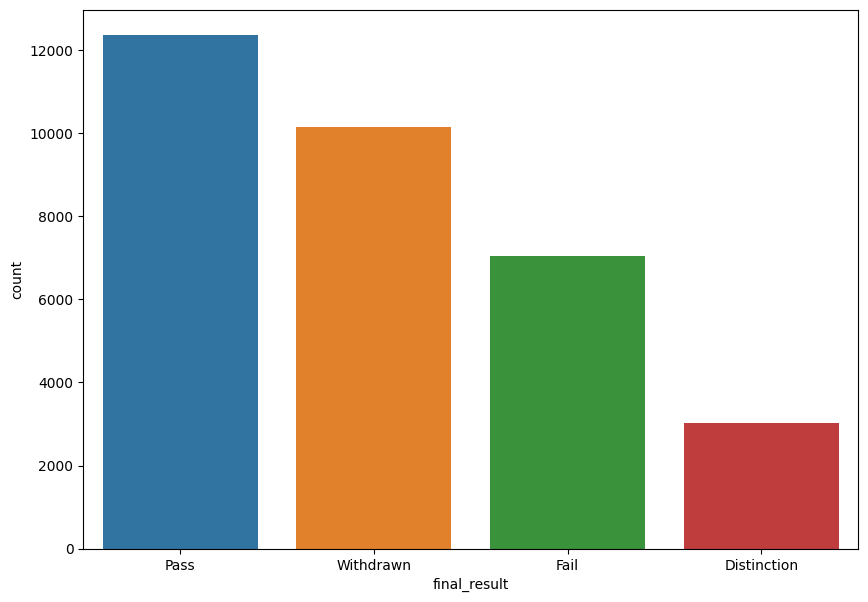

In [77]:
plt.figure(figsize=(10, 7))
sns.countplot(x='final_result', data=data)
plt.show()

In [78]:
data

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,0,1,1,0,1,9,2,0,240,0,Pass,934.0,836.0,98.0,193.0,138.0,553.0,32.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159,268,0.0,410.0,0.0
1,0,1,0,6,1,2,1,0,60,0,Pass,1435.0,1220.0,215.0,417.0,324.0,537.0,87.0,48.0,12.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,268,0.0,332.0,0.0
2,0,1,0,5,0,3,1,0,60,1,Withdrawn,281.0,179.0,102.0,126.0,59.0,66.0,22.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92,268,0.0,0.0,0.0
3,0,1,0,7,0,5,1,0,60,0,Pass,2158.0,1989.0,169.0,634.0,432.0,836.0,144.0,90.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,268,0.0,380.0,0.0
4,0,1,0,11,0,5,0,0,60,0,Pass,1034.0,739.0,295.0,194.0,204.0,494.0,79.0,14.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176,268,0.0,272.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,6,3,0,10,0,1,0,0,30,0,Fail,41.0,39.0,2.0,0.0,22.0,6.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,269,0.0,0.0,0.0
32589,6,3,0,0,0,4,1,0,30,0,Distinction,893.0,893.0,0.0,65.0,167.0,348.0,47.0,0.0,109.0,5.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,269,560.0,233.0,0.0
32590,6,3,0,8,0,2,0,0,30,1,Pass,312.0,297.0,15.0,0.0,63.0,79.0,20.0,0.0,19.0,1.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129,269,480.0,210.0,0.0
32591,6,3,0,7,0,9,1,0,30,0,Withdrawn,275.0,210.0,65.0,118.0,65.0,40.0,12.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,269,100.0,83.0,0.0


**Mengubah seluruh tipe data float menjadi numerik**

In [79]:
def convert_float_to_int(df):
    df = df.fillna(0)  

    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype(int)
    
    return df

In [80]:
data = convert_float_to_int(data)

In [81]:
data

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,0,1,1,0,1,9,2,0,240,0,Pass,934,836,98,193,138,553,32,5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,268,0,410,0
1,0,1,0,6,1,2,1,0,60,0,Pass,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0,53,268,0,332,0
2,0,1,0,5,0,3,1,0,60,1,Withdrawn,281,179,102,126,59,66,22,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,268,0,0,0
3,0,1,0,7,0,5,1,0,60,0,Pass,2158,1989,169,634,432,836,144,90,19,1,2,0,0,0,0,0,0,0,0,0,0,0,0,52,268,0,380,0
4,0,1,0,11,0,5,0,0,60,0,Pass,1034,739,295,194,204,494,79,14,45,4,0,0,0,0,0,0,0,0,0,0,0,0,0,176,268,0,272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,6,3,0,10,0,1,0,0,30,0,Fail,41,39,2,0,22,6,9,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,269,0,0,0
32589,6,3,0,0,0,4,1,0,30,0,Distinction,893,893,0,65,167,348,47,0,109,5,0,0,152,0,0,0,0,0,0,0,0,0,0,23,269,560,233,0
32590,6,3,0,8,0,2,0,0,30,1,Pass,312,297,15,0,63,79,20,0,19,1,0,0,130,0,0,0,0,0,0,0,0,0,0,129,269,480,210,0
32591,6,3,0,7,0,9,1,0,30,0,Withdrawn,275,210,65,118,65,40,12,0,9,0,0,0,31,0,0,0,0,0,0,0,0,0,0,49,269,100,83,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 32593 non-null  int32 
 1   code_presentation           32593 non-null  int32 
 2   gender                      32593 non-null  int32 
 3   region                      32593 non-null  int32 
 4   highest_education           32593 non-null  int64 
 5   imd_band                    32593 non-null  int32 
 6   age_band                    32593 non-null  int32 
 7   num_of_prev_attempts        32593 non-null  int64 
 8   studied_credits             32593 non-null  int64 
 9   disability                  32593 non-null  int32 
 10  final_result                32593 non-null  object
 11  all_activity_sumclick       32593 non-null  int32 
 12  after_clicks_sum            32593 non-null  int32 
 13  before_clicks_sum           32593 non-null  in

In [83]:
data.isnull().sum()

code_module                   0
code_presentation             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
all_activity_sumclick         0
after_clicks_sum              0
before_clicks_sum             0
forumng_clicks_sum            0
homepage_clicks_sum           0
oucontent_clicks_sum          0
subpage_clicks_sum            0
url_clicks_sum                0
resource_clicks_sum           0
glossary_clicks_sum           0
dataplus_clicks_sum           0
oucollaborate_clicks_sum      0
quiz_clicks_sum               0
ouelluminate_clicks_sum       0
sharedsubpage_clicks_sum      0
questionnaire_clicks_sum      0
page_clicks_sum               0
externalquiz_clicks_sum       0
ouwiki_clicks_sum             0
dualpane_clicks_sum           0
repeatac

**Save final data**

In [93]:
data.to_csv('DataFinal32K.csv', index=False)